In [1]:
# Import important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

## 1-Read a data


In [2]:
train_df = pd.read_csv("D:\\Intern\\ALX Internship\\fraudTrain.csv\\fraudTrain.csv")

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_df.shape

(1296675, 23)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# checking for duplicates
train_df.duplicated().sum()

0

In [7]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
train_df.describe(include="O")

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


 ####     let's see each unique value of categorical columns


In [10]:
# Display the total number of transactions and the number of fraud cases for each category
category_total_counts = train_df.groupby('category').size().reset_index(name='total_cases')
category_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_cases')
category_combined_counts = pd.merge(category_total_counts, category_fraud_counts, on='category', how='left')
category_combined_counts = category_combined_counts.sort_values(by='fraud_cases', ascending=False).reset_index(drop=True)
category_combined_counts.head(51)


,category,total_cases,fraud_cases
0,grocery_pos,123638,1743
1,shopping_net,97543,1713
2,misc_net,63287,915
3,shopping_pos,116672,843
4,gas_transport,131659,618
5,misc_pos,79655,250
6,kids_pets,113035,239
7,entertainment,94014,233
8,personal_care,90758,220
9,home,123115,198


Based on the data we have, the following categories show the highest occurrences of fraud:

1. **Grocery POS**: 1743 instances
2. **Shopping Net**: 1713 instances
3. **Misc Net**: 915 instances
4. **Shopping POS**: 843 instances
5. **Gas Transport**: 618 instances

Therefore, we will include this column in our model.


In [11]:
# Display the total number of transactions and the number of fraud cases for each job
job_total_counts = train_df.groupby('job').size().reset_index(name='total_cases')
job_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('job').size().reset_index(name='fraud_cases')
job_combined_counts = pd.merge(job_total_counts, job_fraud_counts, on='job', how='left')
job_combined_counts = job_combined_counts.sort_values(by='fraud_cases', ascending=False).reset_index(drop=True)
job_combined_counts.head(10)


,job,total_cases,fraud_cases
0,Materials engineer,8270,62.0
1,Trading standards officer,4641,56.0
2,Naval architect,8684,53.0
3,Exhibition designer,9199,51.0
4,"Surveyor, land/geomatics",8680,50.0
5,Mechanical engineer,5632,49.0
6,Prison officer,5701,48.0
7,Quantity surveyor,5646,48.0
8,Audiological scientist,6118,46.0
9,Senior tax professional/tax inspector,4106,45.0


The numbers of *fraud cases* for each job category are quite close to each other. If we include this column in our algorithm, it might introduce bias, as the model will be more focused on these jobs. Additionally, if a new job category appears that wasn't present in the training data, the algorithm may not be able to make accurate predictions for it.


In [12]:
# Display the total number of transactions and the number of fraud cases for each state in a single DataFrame for analysis
state_total_counts = train_df.groupby('state').size().reset_index(name='total_cases')
state_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_cases')
state_combined_counts = pd.merge(state_total_counts, state_fraud_counts, on='state', how='left')
state_combined_counts = state_combined_counts.sort_values(by='fraud_cases', ascending=False).reset_index(drop=True)
state_combined_counts.head(51)


,state,total_cases,fraud_cases
0,NY,83501,555
1,TX,94876,479
2,PA,79847,458
3,CA,56360,326
4,OH,46480,321
5,FL,42671,281
6,IL,43252,248
7,MI,46154,238
8,AL,40989,215
9,MN,31714,207



It was observed that there is a lack of information for the state of **Delaware (DE)**, as it has only 9 transactions, while other states have significantly more transactions. Due to this data shortage, including Delaware in the analysis could lead to bias.

As a result, the **state Delaware will be excluded** to avoid any unwanted effects on the model or the resulting analysis.


In [13]:
# Excluding Delaware from the Data
train_df = train_df[train_df['state'] != "DE"]

In [14]:
# Display the total number of transactions and the number of fraud cases for each gender
gender_total_counts = train_df.groupby('gender').size().reset_index(name='total_cases')
gender_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('gender').size().reset_index(name='fraud_cases')
gender_combined_counts = pd.merge(gender_total_counts, gender_fraud_counts, on='gender', how='left')
gender_combined_counts = gender_combined_counts.sort_values(by='fraud_cases', ascending=False).reset_index(drop=True)
gender_combined_counts


,gender,total_cases,fraud_cases
0,M,586812,3771
1,F,709854,3726


In [15]:
# Display the total number of transactions and the number of fraud cases for each merchant in a single DataFrame for analysis
merchant_total_counts = train_df.groupby('merchant').size().reset_index(name='total_cases')
merchant_fraud_counts = train_df[train_df['is_fraud'] == 1].groupby('merchant').size().reset_index(name='fraud_cases')
merchant_combined_counts = pd.merge(merchant_total_counts, merchant_fraud_counts, on='merchant', how='left')
merchant_combined_counts = merchant_combined_counts.sort_values(by='fraud_cases', ascending=False).reset_index(drop=True)
merchant_combined_counts.head(10)


,merchant,total_cases,fraud_cases
0,fraud_Rau and Sons,2490,49.0
1,fraud_Kozey-Boehm,1866,48.0
2,fraud_Doyle Ltd,2558,47.0
3,fraud_Vandervort-Funk,2474,47.0
4,fraud_Kilback LLC,4403,47.0
5,fraud_Cormier LLC,3648,47.0
6,fraud_Padberg-Welch,2424,44.0
7,fraud_Kuhn LLC,3510,44.0
8,fraud_Terry-Huel,1996,43.0
9,fraud_Koepp-Witting,2437,42.0


After analyzing the data, the 'merchant' column does not appear to provide significant value for predictive modeling. To ensure the model focuses on more relevant features and avoids unnecessary complexity, this column will be removed from the dataset.



In [16]:
# Dropping the 'merchant' column as it does not provide significant value for the model
train_df = train_df.drop(columns=['merchant'])

## 2-Data preprocessing

In [17]:
# dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'trans_num', 'unix_time', 'zip', 'job']
train_df = train_df.drop(columns=columns_to_drop, axis=1)

In [18]:
train_df.head()

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,NC,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [19]:
# Convert 'trans_date_trans_time' and 'dob' to datetime format
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"])
train_df["dob"] = pd.to_datetime(train_df["dob"])
train_df.head()

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,NC,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [20]:
# Calculate age by subtracting 'dob' from 'trans_date_trans_time' and extracting the number of years
train_df["age"] = (train_df["trans_date_trans_time"] - train_df["dob"]).dt.days // 365

In [21]:
# Extracting year, month, day, hour, and minute from the transaction date and time
train_df['year'] = train_df['trans_date_trans_time'].dt.year
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df['day'] = train_df['trans_date_trans_time'].dt.day
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['minute'] = train_df['trans_date_trans_time'].dt.minute

In [22]:
# Extracting the weekday (0 = Monday, 6 = Sunday) from the transaction date and time
train_df['weekday'] = train_df['trans_date_trans_time'].dt.weekday

In [23]:
# let's drop unnecessary columns
train_df.drop(columns=["trans_date_trans_time", "dob"],inplace=True)

### Calculating the Distance Between Transaction and Merchant Locations

In this step, we will calculate the distance between the transaction location and the merchant's location using their respective latitude (`lat`, `long`) and longitude (`merch_lat`, `merch_long`) values.

We'll use the **Geopy** library, which provides a simple way to calculate the distance between two geographic points based on their coordinates.

#### Process:
- We will define a function that accepts a row of data and calculates the distance between the transaction's coordinates (`lat`, `long`) and the merchant's coordinates (`merch_lat`, `merch_long`).
- The distance will be calculated using the `geopy.distance.distance` method, which returns the distance in kilometers.
- We will apply this function to each row of the dataframe and create a new column, `distance`, to store the calculated distance.

This will allow us to analyze the spatial relationship between transactions and merchants, which could be important for further analysis like fraud detection or customer behavior.


In [24]:
# import geopy.distance

# Function to calculate distance between two points (lat, lon) and (merch_lat, merch_lon)
# def calculate_distance(row):
#     coords_1 = (row['lat'], row['long'])
#     coords_2 = (row['merch_lat'], row['merch_long'])
#     return geopy.distance.distance(coords_1, coords_2).km  # Distance in kilometers

# # Apply the function to create the 'distance' column
# train_df['distance'] = train_df.apply(calculate_distance, axis=1)


# Distance Calculation Optimization

The current distance calculation process is very slow due to the row-by-row application of the `geopy.distance` function. To speed up this process, we will use **vectorization** to perform the calculations in a more efficient manner.

We will use the first optimized method, which converts the `lat`, `long`, `merch_lat`, and `merch_long` columns into NumPy arrays and calculates the distance in a vectorized way. This approach will allow us to apply the distance calculation to the entire dataset at once, significantly improving performance.


In [25]:
from geopy.distance import geodesic

# Define the latitudes and longitudes
latitudes = train_df['lat'].values
longitudes = train_df['long'].values
merchant_latitudes = train_df['merch_lat'].values
merchant_longitudes = train_df['merch_long'].values

# Calculate the distance using vectorized operations
distances = np.vectorize(lambda lat, lon, merch_lat, merch_lon: geodesic((lat, lon), (merch_lat, merch_lon)).km)(latitudes,
                                                longitudes, merchant_latitudes, merchant_longitudes)

# Add the result to a new column
train_df['distance'] = distances
train_df['distance'] = train_df['distance'].round(2)


In [26]:
train_df = train_df.drop(columns= ['lat', 'long', 'merch_lat', 'merch_long'])

In [27]:
train_df[(train_df['is_fraud'] == 1) & (train_df['distance'] > 100)].head()

,category,amt,gender,state,city_pop,is_fraud,age,year,month,day,hour,minute,weekday,distance
4383,shopping_pos,711.66,F,PA,1472,1,77,2019,1,3,18,7,3,118.97
4693,travel,4.50,F,PA,1472,1,77,2019,1,3,22,58,3,116.06
4727,shopping_net,1092.68,M,NC,885,1,30,2019,1,3,23,29,3,139.19
4808,grocery_net,14.37,M,AK,145,1,79,2019,1,4,0,58,4,109.60
4858,grocery_pos,316.93,F,PA,1472,1,77,2019,1,4,2,13,4,102.13


## 3-EDA

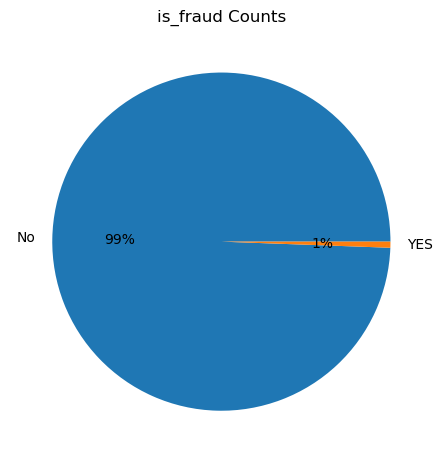

In [28]:
# let's check if the label balanced or not
label_counts = train_df["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(label_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.show()

In this chart, we can see that the data is highly imbalanced between the classes. The `is_fraud` column shows a clear difference between "No" (99%) and "YES" (1%). This indicates an unbalanced data problem, and it will be necessary to apply techniques such as oversampling, undersampling, or using methods like SMOTE to address this issue and improve the model's accuracy.


In [29]:
train_df[train_df['is_fraud'] ==1].shape

(7497, 14)

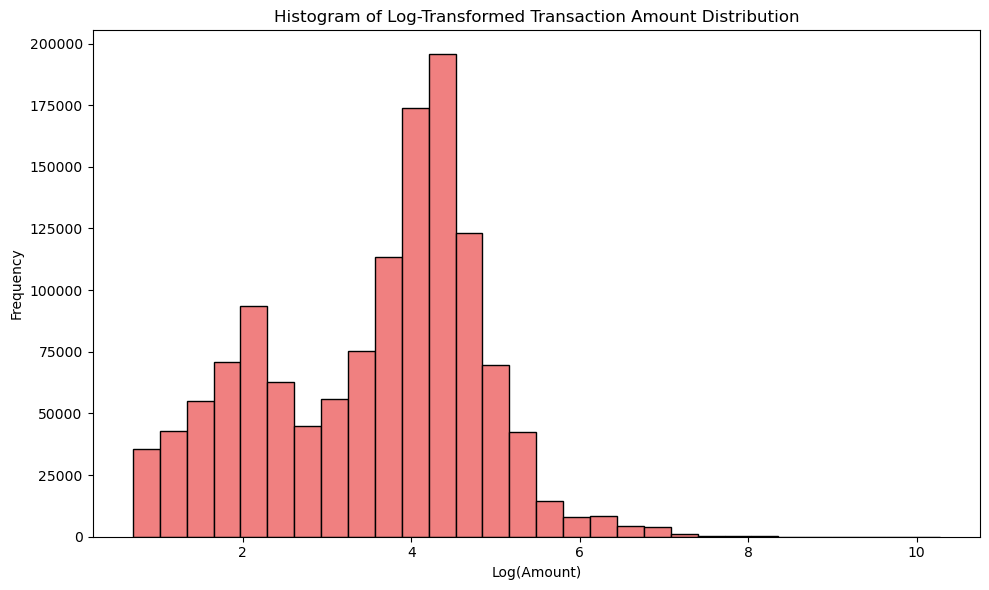

In [30]:
# Apply log transformation directly when plotting
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(train_df['amt']), bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


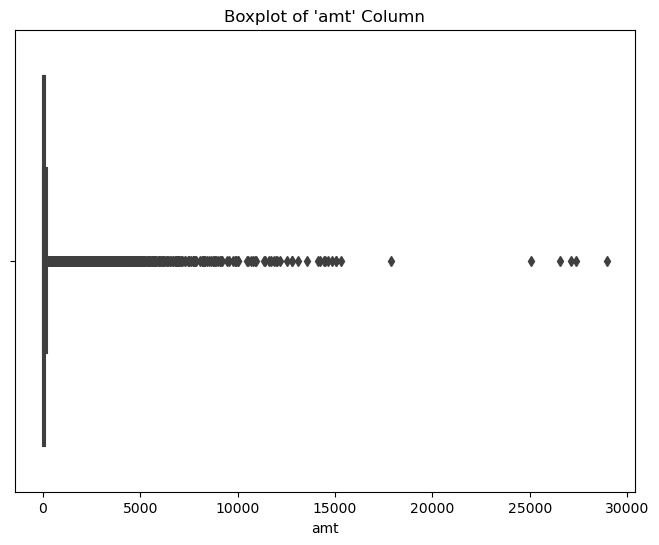

In [31]:
# Create a boxplot for 'amt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['amt'])
plt.title("Boxplot of 'amt' Column")
plt.show()

In [32]:
train_df[train_df["amt"] > 8000].head()

,category,amt,gender,state,city_pop,is_fraud,age,year,month,day,hour,minute,weekday,distance
17743,travel,11872.21,F,NH,1368,0,47,2019,1,11,16,37,4,51.13
37315,travel,10776.59,M,TX,1595797,0,23,2019,1,22,15,24,1,46.30
59564,travel,12788.07,M,NY,11250,0,41,2019,2,4,21,22,0,90.36
105732,travel,11629.34,F,RI,203571,0,23,2019,3,2,15,36,5,74.16
114001,travel,9931.82,F,IN,1423,0,20,2019,3,5,15,49,1,62.06



Although the high transaction amounts (amt) in the "travel" category are considered outliers, I have decided to **keep them** in the dataset for the following reasons:

1. **Relevant for Travel Industry Transactions**: 
   - High-value transactions are not unusual in the travel sector, where large amounts are often spent on things like flight bookings or luxury accommodations. These transactions may appear as outliers but are legitimate within the context.

2. **No Fraud Indicators**: 
   - Despite being outliers, these transactions do not indicate fraudulent behavior, as shown by the `is_fraud` column, where all these records are marked as `0`.

3. **Data Balance Consideration**: 
   - Removing these outliers might skew the data and reduce the diversity needed to train a model that can correctly identify fraud in both regular and high-value transactions.

Thus, while these are outliers, they provide important information about normal, high-value transactions in the dataset, and I will retain them for the model’s training purposes.


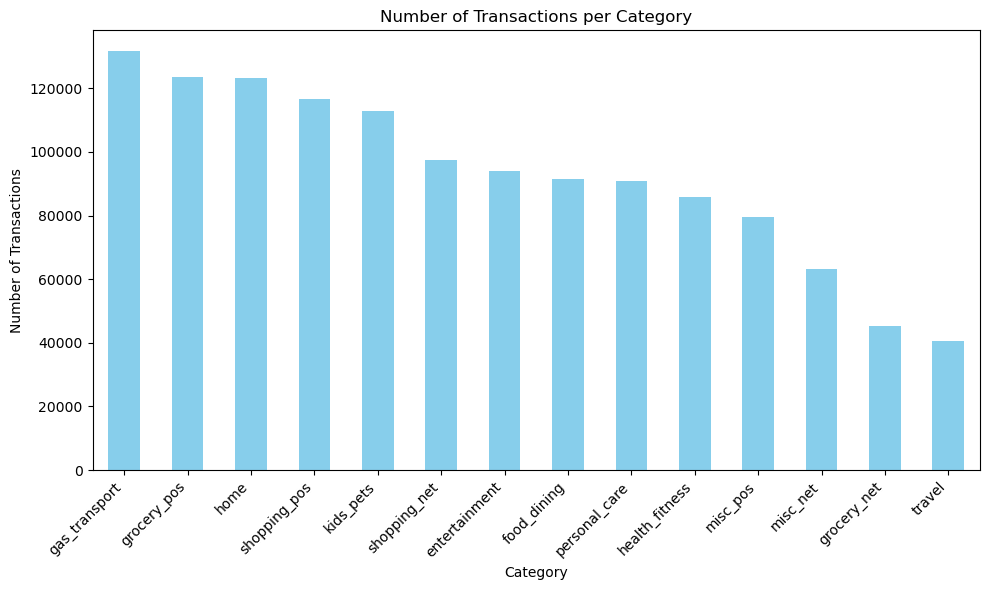

In [33]:
# Count the number of transactions for each category
category_counts = train_df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

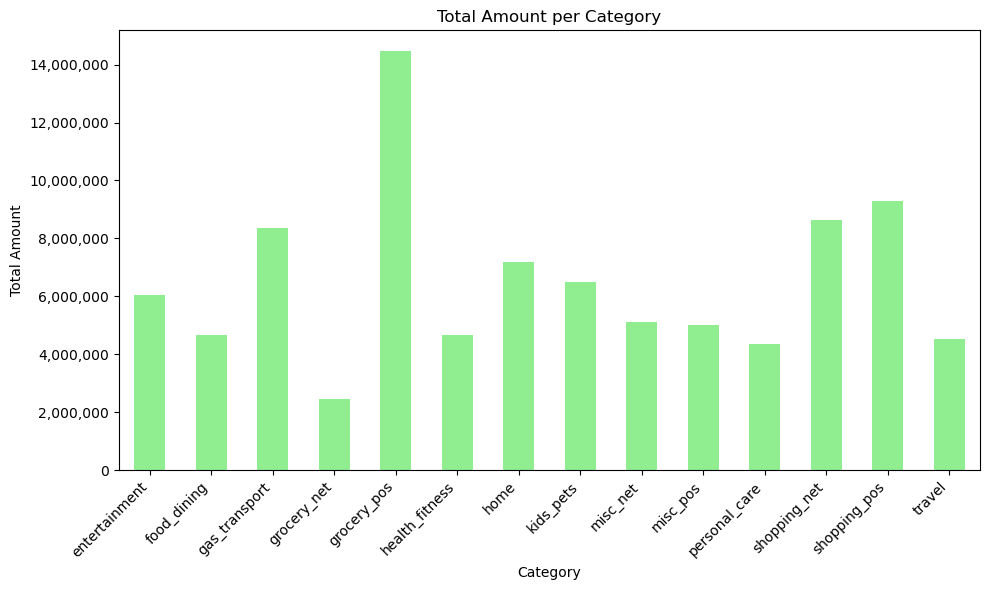

In [34]:
from matplotlib.ticker import FuncFormatter

# Group by category and calculate the sum of 'amt' for each category
category_amounts = train_df.groupby('category')['amt'].sum()

plt.figure(figsize=(10, 6))
category_amounts.plot(kind='bar', color='lightgreen')
plt.title('Total Amount per Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')

formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}') 
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


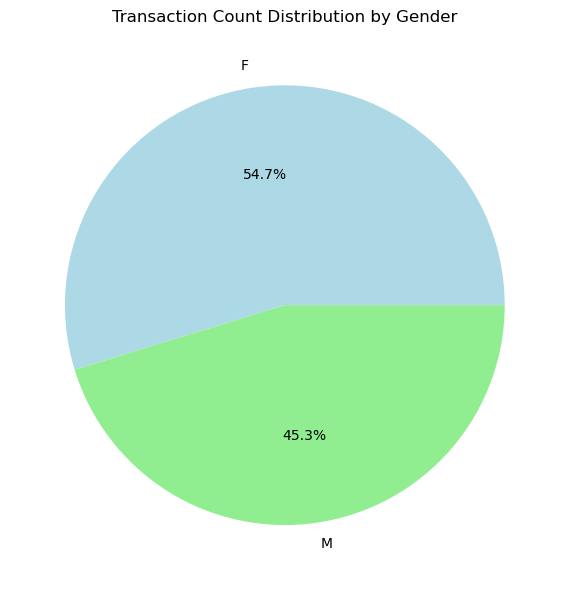

In [35]:
# Group by 'gender' and count the number of transactions for each gender
gender_transaction_counts = train_df.groupby('gender').size().reset_index(name='transaction_count')

# Plot the pie chart to show the transaction counts for each gender
plt.figure(figsize=(8, 6))
gender_transaction_counts.set_index('gender')['transaction_count'].plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])

plt.title('Transaction Count Distribution by Gender')
plt.ylabel('') 
plt.tight_layout()
plt.show()


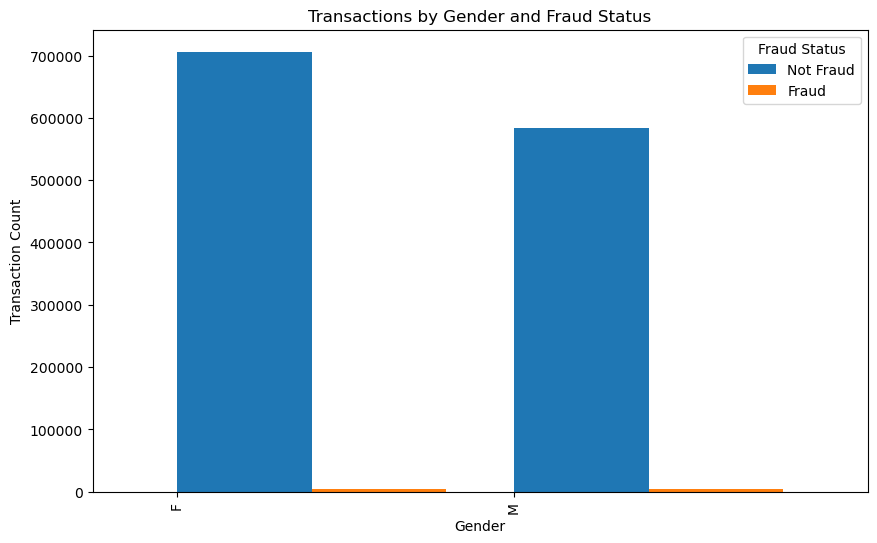

In [36]:
# Group by 'gender' and 'is_fraud', then count the number of transactions
gender_fraud_counts = train_df.groupby(['gender', 'is_fraud']).size().reset_index(name='transaction_count')

gender_fraud_counts_pivot = gender_fraud_counts.pivot(index='gender', columns='is_fraud', values='transaction_count')
gender_fraud_counts_pivot.plot(kind='bar', figsize=(10, 6), width=0.8, position=0)
plt.title('Transactions by Gender and Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud Status', labels=['Not Fraud', 'Fraud'])
plt.show()


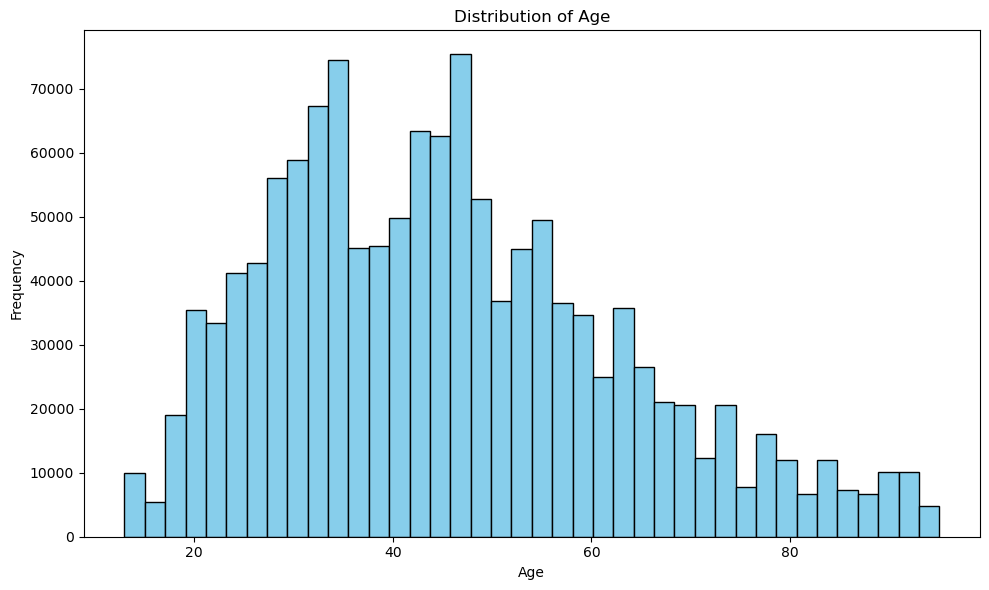

In [37]:
# Plot a histogram to show the distribution of age
plt.figure(figsize=(10, 6))
plt.hist(train_df['age'], bins=40, color='skyblue', edgecolor='black')

# Set title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
# Filtering the transactions where the age is either greater than 60 or less than 20, 
# and the transaction is marked as fraudulent (is_fraud == 1)
train_df[(train_df['age'] > 60) & (train_df['is_fraud'] == 1) | (train_df['age'] < 20) & (train_df['is_fraud'] == 1)]

,category,amt,gender,state,city_pop,is_fraud,age,year,month,day,hour,minute,weekday,distance
4324,grocery_pos,337.05,F,PA,1472,1,77,2019,1,3,16,54,3,93.96
4383,shopping_pos,711.66,F,PA,1472,1,77,2019,1,3,18,7,3,118.97
4644,misc_net,707.50,F,PA,1472,1,77,2019,1,3,22,9,3,81.22
4693,travel,4.50,F,PA,1472,1,77,2019,1,3,22,58,3,116.06
4808,grocery_net,14.37,M,AK,145,1,79,2019,1,4,0,58,4,109.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295103,misc_net,735.19,M,WI,1306,1,61,2020,6,20,22,28,5,86.69
1295108,shopping_net,1064.44,F,KY,13061,1,61,2020,6,20,22,29,5,60.88
1295194,misc_net,824.27,F,KY,13061,1,61,2020,6,20,23,4,5,69.00
1295219,grocery_pos,307.71,M,WI,1306,1,61,2020,6,20,23,17,5,17.47


Out of the 7,497 fraud cases, 2,087 have an age greater than 60 or less than 20.


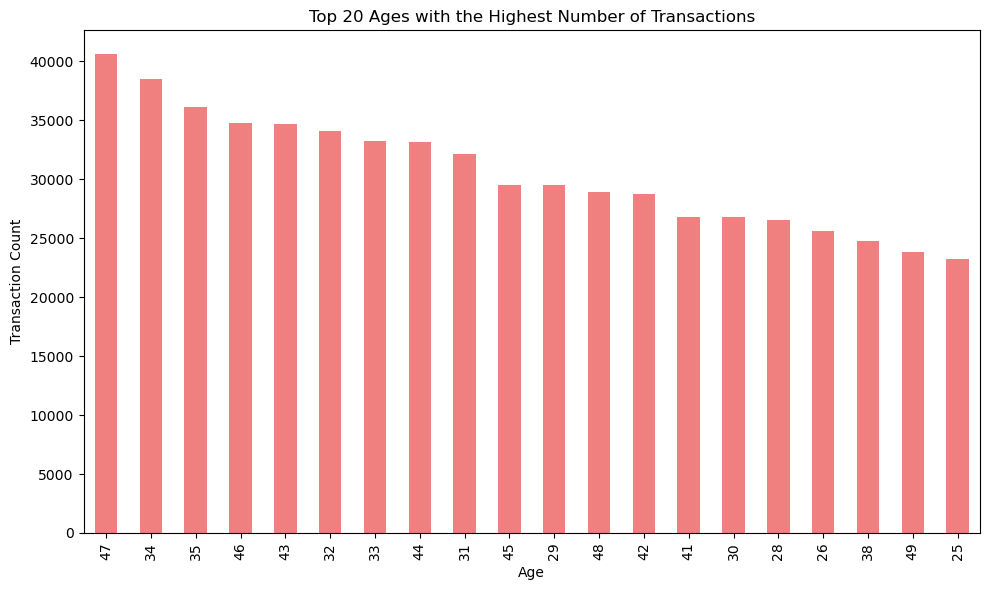

In [39]:
# Group by 'age' and count the number of transactions for each age
age_transaction_counts = train_df.groupby('age').size().reset_index(name='transaction_count')
top_20_age_transaction_counts = age_transaction_counts.sort_values(by='transaction_count', ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_age_transaction_counts.set_index('age')['transaction_count'].plot(kind='bar', color='lightcoral')

plt.title('Top 20 Ages with the Highest Number of Transactions')
plt.xlabel('Age')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


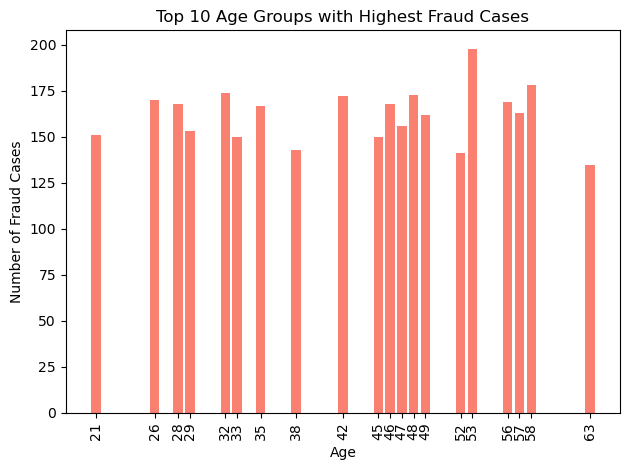

In [40]:
# select the top 15 age groups with the highest number of fraud cases to visualize them in a bar chart.
fraud_df = train_df[train_df['is_fraud'] == 1]
age_fraud_counts = fraud_df.groupby('age').size().reset_index(name='fraud_count')
top_10_age_fraud = age_fraud_counts.sort_values(by='fraud_count', ascending=False).head(20)

plt.bar(top_10_age_fraud['age'], top_10_age_fraud['fraud_count'], color='salmon')
plt.title('Top 10 Age Groups with Highest Fraud Cases')
plt.xlabel('Age')
plt.ylabel('Number of Fraud Cases')
plt.xticks(top_10_age_fraud['age'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [41]:
fraud_df = train_df[train_df['is_fraud'] == 1]
age_fraud_counts = fraud_df.groupby('age').size().reset_index(name='fraud_count')
top_10_age_fraud = age_fraud_counts.sort_values(by='fraud_count', ascending=False).head(10)

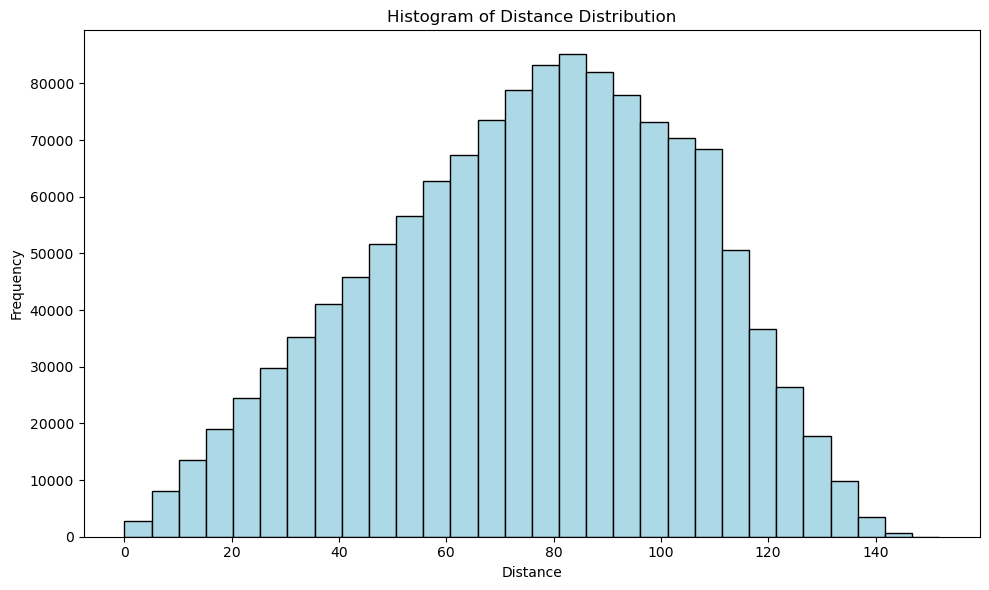

In [42]:
# Plot a histogram for the 'distance' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['distance'], bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

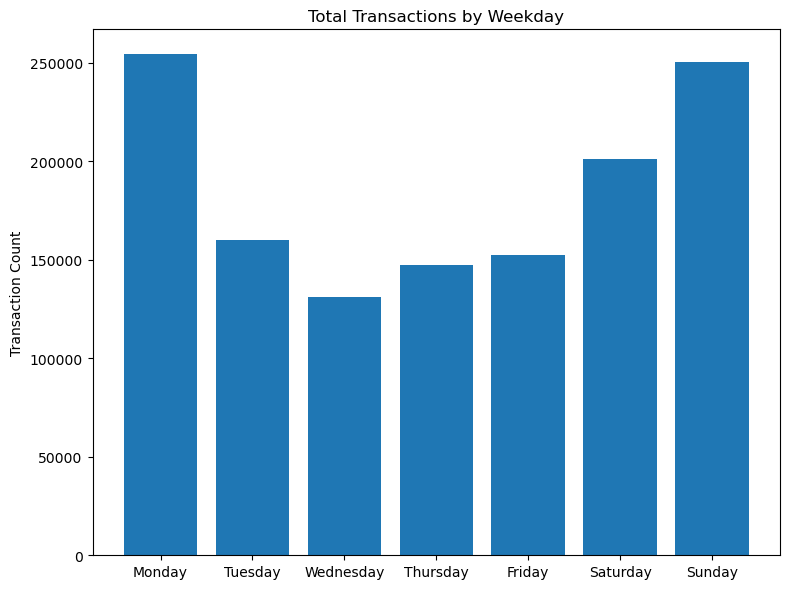

In [43]:
# Create a mapping from numeric weekday values to actual weekday names
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

weekday_transaction_counts = train_df.groupby('weekday').size().reset_index(name='transaction_count')
weekday_transaction_counts['weekday'] = weekday_transaction_counts['weekday'].map(weekday_mapping)
plt.figure(figsize=(8, 6))
plt.bar(weekday_transaction_counts['weekday'], weekday_transaction_counts['transaction_count'],)
plt.title('Total Transactions by Weekday')
plt.xlabel('')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()


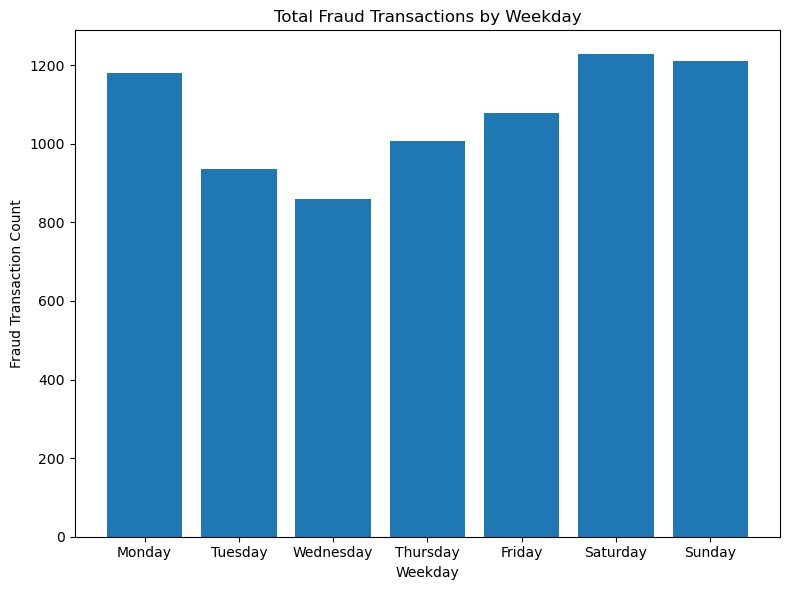

In [44]:
fraud_df = train_df[train_df['is_fraud'] == 1]

# Group by 'weekday' and count the number of fraud transactions for each day
fraud_weekday_counts = fraud_df.groupby('weekday').size().reset_index(name='fraud_transaction_count')
fraud_weekday_counts['weekday'] = fraud_weekday_counts['weekday'].map(weekday_mapping)

plt.figure(figsize=(8, 6))
plt.bar(fraud_weekday_counts['weekday'], fraud_weekday_counts['fraud_transaction_count'])
plt.title('Total Fraud Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Fraud Transaction Count')
plt.tight_layout()
plt.show()


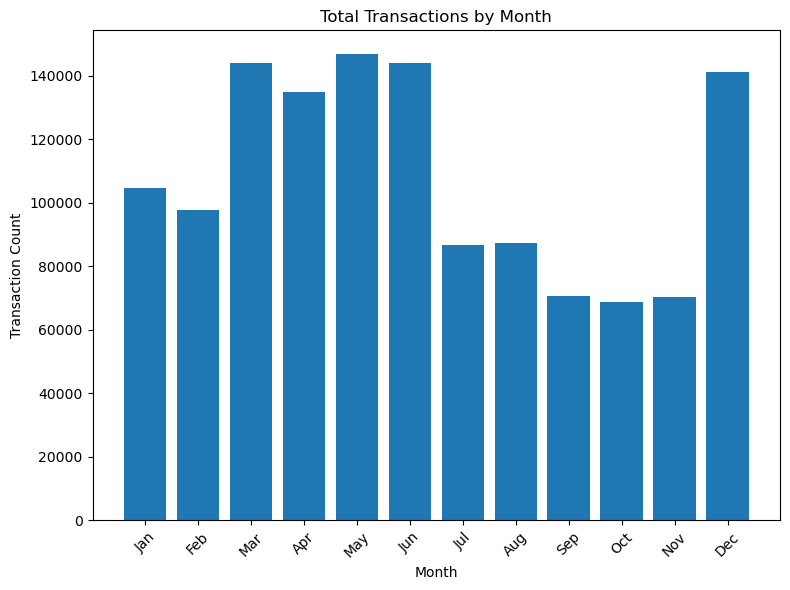

In [45]:
# Group by 'month' and count the number of transactions for each month
monthly_transaction_counts = train_df.groupby('month').size().reset_index(name='transaction_count')

plt.figure(figsize=(8, 6))
plt.bar(monthly_transaction_counts['month'], monthly_transaction_counts['transaction_count'])
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_transaction_counts['month'], month_names, rotation=45)
plt.tight_layout()
plt.show()


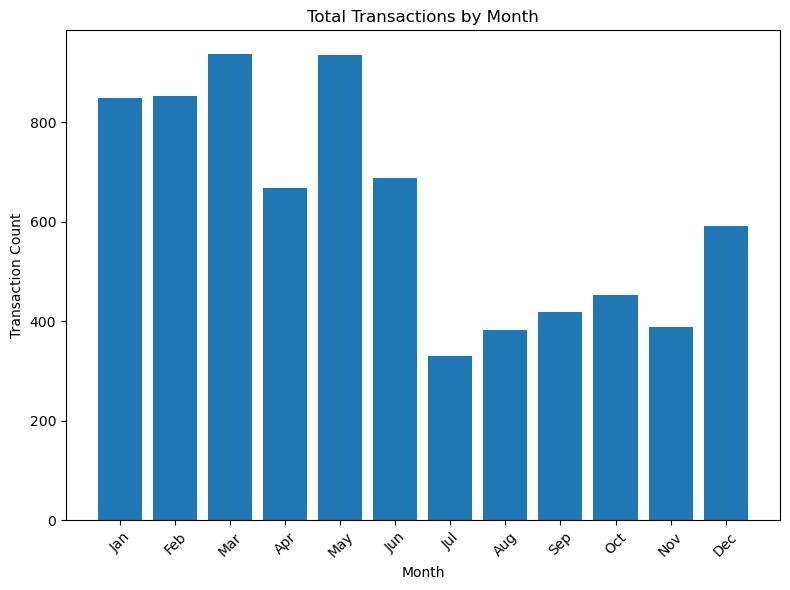

In [46]:
fraud_transactions = train_df[train_df['is_fraud'] == 1]

# Group by 'month' and count the number of transactions for each month
monthly_transaction_counts = fraud_transactions.groupby('month').size().reset_index(name='transaction_count')

plt.figure(figsize=(8, 6))
plt.bar(monthly_transaction_counts['month'], monthly_transaction_counts['transaction_count'])
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_transaction_counts['month'], month_names, rotation=45)
plt.tight_layout()
plt.show()


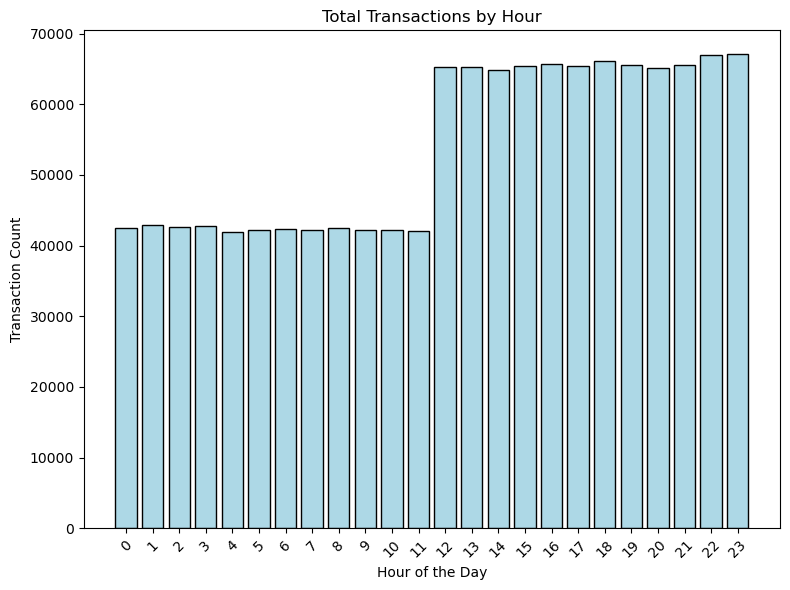

In [47]:
# Group by 'hour' and count the number of transactions for each hour
hourly_transaction_counts = train_df.groupby('hour').size().reset_index(name='transaction_count')

plt.figure(figsize=(8, 6))
plt.bar(hourly_transaction_counts['hour'], hourly_transaction_counts['transaction_count'], color='lightblue', edgecolor='black')
plt.title('Total Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.xticks(hourly_transaction_counts['hour'], rotation=45)
plt.tight_layout()
plt.show()


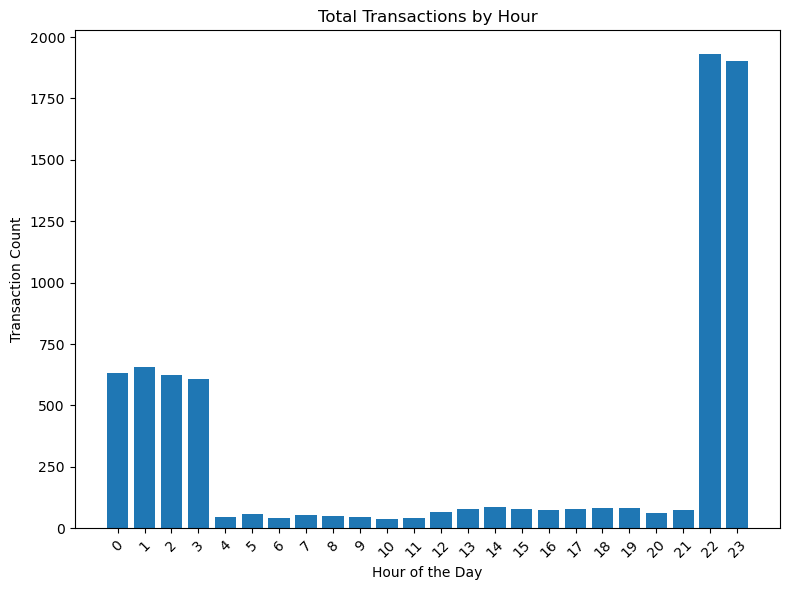

In [48]:
fraud_transactions = train_df[train_df['is_fraud'] == 1]

# Group by 'hour' and count the number of transactions for each hour
hourly_transaction_counts = fraud_transactions.groupby('hour').size().reset_index(name='transaction_count')

plt.figure(figsize=(8, 6))
plt.bar(hourly_transaction_counts['hour'], hourly_transaction_counts['transaction_count'])
plt.title('Total Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.xticks(hourly_transaction_counts['hour'], rotation=45)
plt.tight_layout()
plt.show()


### Why Fraud Occurs More Frequently Between 23:00 and 24:00?

The increased number of fraud transactions during the hours 23:00 (11 PM) and 24:00 (12 AM) could be attributed to several factors:

1. **Late-Night User Behavior:**
   - Users may be more likely to engage in suspicious or abnormal activities during late hours, either due to less vigilance or being in a more relaxed or private environment (e.g., at home).
   - Fraudulent transactions might be carried out more easily during these hours when users are less aware or distracted.

2. **Reduced Monitoring and Oversight:**
   - During late hours, there is often a reduction in active monitoring by security teams. As a result, there may be fewer real-time alerts or responses to fraudulent activities.
   - Fraudsters may take advantage of this time window when the systems are not as tightly monitored.

3. **Promotions or Offers:**
   - There could be an increase in fraudulent activities due to promotions, discounts, or special offers that are offered during late-night hours.
   - Fraudsters may exploit these offers by initiating fake transactions or using stolen credentials to make purchases.

4. **Increase in Fraudulent Online Transactions:**
   - Some fraud attacks are more likely to occur at night when fraudsters believe they can exploit security gaps or vulnerabilities in the system.
   - Fraudsters may feel more confident to perform fraudulent actions during this "quiet" period, thinking they are less likely to be detected.

### Further Investigation:
To fully understand the root cause, further analysis is needed, such as:
- Identifying specific patterns in the fraudulent transactions occurring during these hours.
- Investigating the types of transactions and user behaviors linked to fraud in these time slots.
- Reviewing system logs and security data to check for vulnerabilities or weaknesses during late-night hours.

By focusing on these insights, we can better understand the underlying causes of fraud at these times and take appropriate steps to mitigate it.


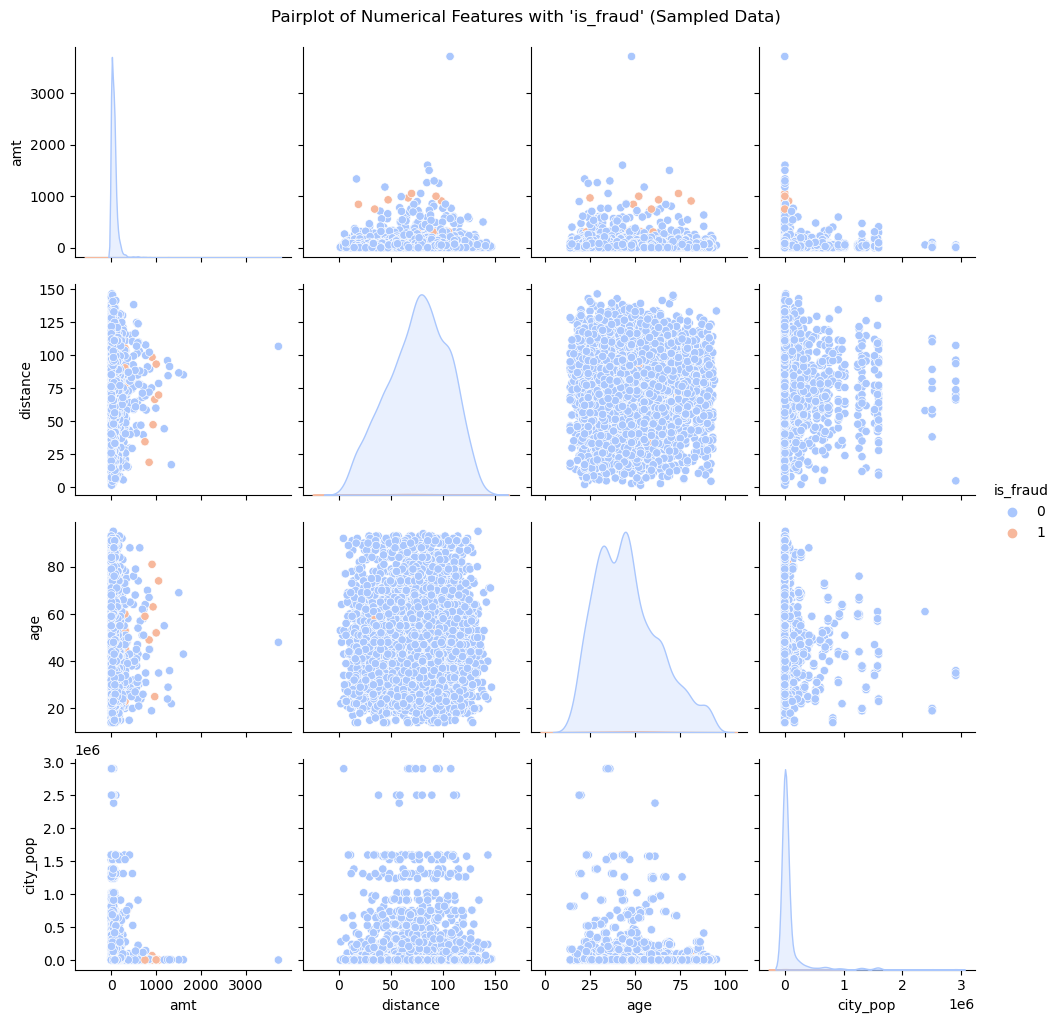

In [49]:
# Selecting numerical columns and 'is_fraud' for pairplot
numerical_columns = ['amt', 'distance', 'age', 'city_pop', 'is_fraud']
sampled_df = train_df[numerical_columns].sample(n=5000, random_state=42)

sns.pairplot(sampled_df, hue='is_fraud', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairplot of Numerical Features with 'is_fraud' (Sampled Data)", y=1.02)
plt.show()


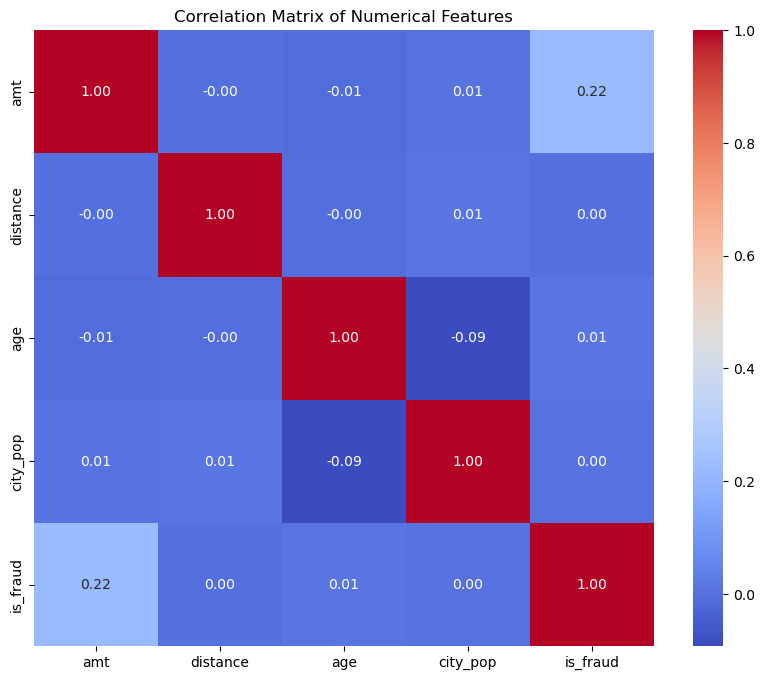

In [50]:
# Selecting only numerical columns for the correlation matrix
numerical_columns = ['amt', 'distance', 'age', 'city_pop', 'is_fraud']  # Add more if needed
correlation_matrix = train_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Dropping 'city_pop' Column

The 'city_pop' (City Population) column was dropped from the dataset because:

- **Negative Correlation with 'age'**: There was a clear inverse relationship between 'age' and 'city_pop', which is a common scenario where larger cities tend to have younger populations. This correlation was expected and did not add significant value to the fraud detection model.
  
- **Irrelevance for Fraud Detection**: The population size in a city does not directly impact the likelihood of fraud. Therefore, keeping the 'city_pop' variable may introduce noise into the model without improving its predictive power.
  
Thus, dropping this column helps streamline the model and reduce potential overfitting due to irrelevant features.


In [51]:
train_df = train_df.drop(columns = ['city_pop'])

In [53]:
#  original_df = train_df.copy()

# 4-Data preparation for model building

In [54]:
train_df.describe(include = "O")

,category,gender,state
count,1296666,1296666,1296666
unique,14,2,50
top,gas_transport,F,TX
freq,131659,709854,94876


In [55]:
train_df = train_df.drop(columns=['state'])

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_encoded = onehot_encoder.fit_transform(train_df[['category']])
category_df = pd.DataFrame(category_encoded, columns=onehot_encoder.get_feature_names_out(['category']))

label_encoder = LabelEncoder()
train_df['gender'] = label_encoder.fit_transform(train_df['gender'])

if len(train_df) == len(category_df):
    train_df = pd.concat([train_df.reset_index(drop=True), category_df.reset_index(drop=True)], axis=1)
else:
    print("Row mismatch detected! Debug required.")

train_df.drop(['category'], axis=1, inplace=True)
print("shape of train_df:", train_df.shape)


shape of train_df: (1296666, 25)


In [57]:
train_df

,amt,gender,is_fraud,age,year,month,day,hour,minute,weekday,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,0,30,2019,1,1,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,107.23,0,0,40,2019,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,220.11,1,0,56,2019,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.00,1,0,52,2019,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.96,1,0,32,2019,1,1,0,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296661,15.56,1,0,58,2020,6,21,12,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296662,51.70,1,0,40,2020,6,21,12,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296663,105.93,1,0,52,2020,6,21,12,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296664,74.90,1,0,39,2020,6,21,12,13,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Move 'is_fraud' column to the end
columns = [col for col in train_df.columns if col != 'is_fraud'] + ['is_fraud']
train_df = train_df[columns]
train_df.head()

,amt,gender,age,year,month,day,hour,minute,weekday,distance,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,4.97,0,30,2019,1,1,0,0,1,78.77,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,107.23,0,40,2019,1,1,0,0,1,30.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,220.11,1,56,2019,1,1,0,0,1,108.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,45.00,1,52,2019,1,1,0,1,1,95.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,41.96,1,32,2019,1,1,0,3,1,77.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [59]:
train_df.describe()

,amt,gender,age,year,month,day,hour,minute,weekday,distance,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
count,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,...,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06,1.296666e+06
mean,7.034795e+01,4.525545e-01,4.552841e+01,2.019287e+03,6.142165e+00,1.558789e+01,1.280487e+01,2.949527e+01,3.070597e+00,7.611245e+01,...,6.622985e-02,9.494735e-02,8.717357e-02,4.880594e-02,6.143062e-02,6.999335e-02,7.522446e-02,8.997845e-02,3.123935e-02,5.781751e-03
std,1.603091e+02,4.977440e-01,1.740887e+01,4.522461e-01,3.417711e+00,8.829088e+00,6.817800e+00,1.732019e+01,2.198146e+00,2.909268e+01,...,2.486836e-01,2.931423e-01,2.820893e-01,2.154622e-01,2.401186e-01,2.551359e-01,2.637533e-01,2.861510e-01,1.739640e-01,7.581772e-02
min,1.000000e+00,0.000000e+00,1.300000e+01,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.650000e+00,0.000000e+00,3.200000e+01,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.400000e+01,1.000000e+00,5.536000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.752000e+01,0.000000e+00,4.400000e+01,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,3.000000e+00,7.826000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.314000e+01,1.000000e+00,5.700000e+01,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,9.847000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.894890e+04,1.000000e+00,9.500000e+01,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.518700e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = train_df.copy()
scaler = StandardScaler()
columns_to_scale = ['amt', 'age', 'distance']
data_scaled[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])


In [61]:
data_scaled['hour_sin'] = np.sin(2 * np.pi * data_scaled['hour'] / 24)
data_scaled['hour_cos'] = np.cos(2 * np.pi * data_scaled['hour'] / 24)
data_scaled.drop(columns=['hour'], inplace=True)
data_scaled.drop(columns=['minute'], inplace=True)



#### Feature Engineering: Hour Transformation (Sine & Cosine)

I transformed the "hour" feature into cyclic representations using Sine and Cosine functions to preserve its periodic nature. This ensures the model correctly interprets the relationship between hours without assuming a linear order, avoiding misinterpretations and reducing multicollinearity.


In [62]:
data_scaled

,amt,gender,age,year,month,day,weekday,distance,category_entertainment,category_food_dining,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud,hour_sin,hour_cos
0,-0.407825,0,-0.891983,2019,1,1,1,0.091348,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0
1,0.230068,0,-0.317563,2019,1,1,1,-1.577458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0
2,0.934209,1,0.601509,2019,1,1,1,1.099506,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0
3,-0.158119,1,0.371741,2019,1,1,1,0.672938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0
4,-0.177083,1,-0.777099,2019,1,1,1,0.054569,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296661,-0.341765,1,0.716393,2020,6,21,6,1.498232,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.224647e-16,-1.0
1296662,-0.116325,1,-0.317563,2020,6,21,6,-0.031364,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.224647e-16,-1.0
1296663,0.221959,1,0.371741,2020,6,21,6,0.786368,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.224647e-16,-1.0
1296664,0.028395,1,-0.375005,2020,6,21,6,0.294835,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.224647e-16,-1.0


# 5-Model Building


In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings("ignore")

In [64]:
X = data_scaled.drop('is_fraud', axis=1) 
y = data_scaled['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


SMOTE was applied only to the training dataset to prevent data leakage. If applied to the entire dataset, it would allow the model to learn from synthetic samples in the test set, leading to biased performance evaluation.


In [66]:
X_train_smote.shape

(2062636, 24)

In [67]:
scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
}

In [88]:
rfc_model = RandomForestClassifier(n_estimators=100,
    max_depth=10,               
    min_samples_split=2,      
    min_samples_leaf=1,       
    max_features='auto',      
    random_state=42,          
    bootstrap=True)      

rfc_model.fit(X_train_smote, y_train_smote)
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257851
           1       0.91      0.79      0.84      1483

    accuracy                           1.00    259334
   macro avg       0.96      0.89      0.92    259334
weighted avg       1.00      1.00      1.00    259334



In [86]:
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    257851
           1       0.04      0.82      0.08      1483

    accuracy                           0.89    259334
   macro avg       0.52      0.86      0.51    259334
weighted avg       0.99      0.89      0.94    259334



In [ ]:
# svc_model = SVC()
# svc_model.fit(X_train_smote, y_train_smote)
# y_pred = svc_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [68]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smote, y_train_smote)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257851
           1       0.23      0.72      0.35      1483

    accuracy                           0.98    259334
   macro avg       0.62      0.85      0.67    259334
weighted avg       0.99      0.98      0.99    259334



In [69]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote, y_train_smote)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257851
           1       0.73      0.81      0.77      1483

    accuracy                           1.00    259334
   macro avg       0.87      0.90      0.88    259334
weighted avg       1.00      1.00      1.00    259334



In [70]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_smote, y_train_smote)
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257851
           1       0.32      0.86      0.47      1483

    accuracy                           0.99    259334
   macro avg       0.66      0.92      0.73    259334
weighted avg       1.00      0.99      0.99    259334



In [71]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_smote, y_train_smote)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257851
           1       0.76      0.86      0.81      1483

    accuracy                           1.00    259334
   macro avg       0.88      0.93      0.90    259334
weighted avg       1.00      1.00      1.00    259334



In [72]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_smote, y_train_smote)
y_pred = lgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1031318, number of negative: 1031318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4894
[LightGBM] [Info] Number of data points in the train set: 2062636, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257851
           1       0.64      0.87      0.74      1483

    accuracy                           1.00    259334
   macro avg       0.82      0.93      0.87    259334
weighted avg       1.00      1.00      1.00    259334



In [75]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/10
32417/32417 [==============================] - 71s 2ms/step - loss: 1.7549 - accuracy: 0.4606 - val_loss: 0.7010 - val_accuracy: 0.0058
Epoch 2/10
32417/32417 [==============================] - 68s 2ms/step - loss: 0.6939 - accuracy: 0.4818 - val_loss: 0.7165 - val_accuracy: 0.0057
Epoch 3/10
32417/32417 [==============================] - 71s 2ms/step - loss: 0.6940 - accuracy: 0.4191 - val_loss: 0.7025 - val_accuracy: 0.0058
Epoch 4/10
32417/32417 [==============================] - 70s 2ms/step - loss: 0.6936 - accuracy: 0.5089 - val_loss: 0.7059 - val_accuracy: 0.0058
Epoch 5/10
32417/32417 [==============================] - 70s 2ms/step - loss: 0.7026 - accuracy: 0.4262 - val_loss: 0.6813 - val_accuracy: 0.9943
Epoch 6/10
32417/32417 [==============================] - 70s 2ms/step - loss: 0.7061 - accuracy: 0.5752 - val_loss: 0.7092 - val_accuracy: 0.0058
Epoch 7/10
32417/32417 [==============================] - 69s 2ms/step - loss: 0.7004 - accuracy: 0.4457 - val_loss: 0

In [77]:
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257851
           1       0.00      0.00      0.00      1483

    accuracy                           0.99    259334
   macro avg       0.50      0.50      0.50    259334
weighted avg       0.99      0.99      0.99    259334



In [84]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=3, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.9).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/3
64458/64458 [==============================] - 114s 2ms/step - loss: 0.3182 - accuracy: 0.8627 - val_loss: 0.1497 - val_accuracy: 0.9498
Epoch 2/3
64458/64458 [==============================] - 113s 2ms/step - loss: 0.1873 - accuracy: 0.9171 - val_loss: 0.0783 - val_accuracy: 0.9744
Epoch 3/3
8105/8105 [==============================] - 8s 994us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257851
           1       0.30      0.83      0.44      1483

    accuracy                           0.99    259334
   macro avg       0.65      0.91      0.72    259334
weighted avg       0.99      0.99      0.99    259334



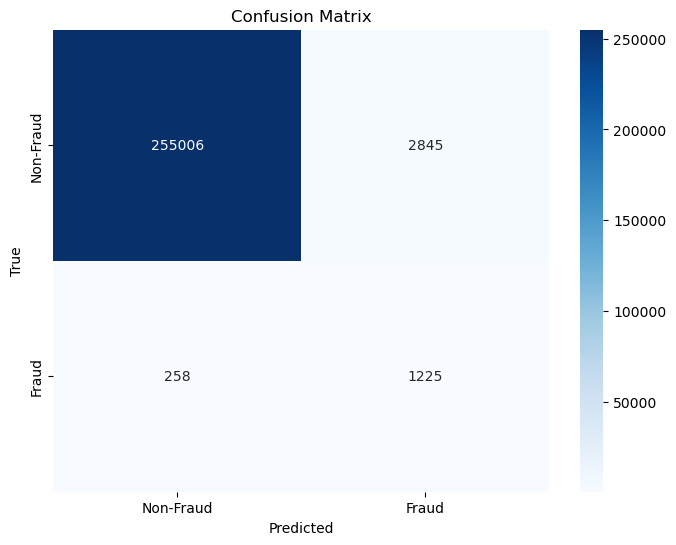

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Random Forest Classifier - The Best Model for Our Data
The Random Forest Classifier proved to be the best model for our data, offering the highest performance in fraud detection. Its ability to handle complex, high-dimensional datasets and its robustness to overfitting made it the ideal choice for predicting fraudulent transactions. By leveraging multiple decision trees, it successfully captured the intricate patterns in the data, leading to accurate and reliable predictions.

# 6-Save The Model

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Custom transformer to calculate distance between lat/long and merchant lat/long
class DistanceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        latitudes = X['lat'].values
        longitudes = X['long'].values
        merchant_latitudes = X['merch_lat'].values
        merchant_longitudes = X['merch_long'].values
        
        # Calculate distances using geopy's geodesic
        distances = np.vectorize(lambda lat, lon, merch_lat, merch_lon: geodesic((lat, lon), (merch_lat, merch_lon)).km)(
            latitudes, longitudes, merchant_latitudes, merchant_longitudes)
        
        X['distance'] = distances
        return X

# Preprocessing function to apply all preprocessing steps
def preprocess_data(df):
    columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'trans_num', 'unix_time', 
                       'zip', 'job','lat', 'long', 'merch_lat', 'merch_long']
    df = df.drop(columns=columns_to_drop, axis=1)

    # Convert datetime columns
    df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
    df["dob"] = pd.to_datetime(df["dob"])

    # Feature engineering
    df["age"] = (df["trans_date_trans_time"] - df["dob"]).dt.days // 365
    df['year'] = df['trans_date_trans_time'].dt.year
    df['month'] = df['trans_date_trans_time'].dt.month
    df['day'] = df['trans_date_trans_time'].dt.day
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['minute'] = df['trans_date_trans_time'].dt.minute
    df['weekday'] = df['trans_date_trans_time'].dt.weekday
    df.drop(columns=["trans_date_trans_time", "dob"], inplace=True)

    return df

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
        ('gender', OneHotEncoder(handle_unknown='ignore'), ['gender']),
        ('num', StandardScaler(), ['amt', 'age', 'distance']),
        ('distance', DistanceTransformer(), ['lat', 'long', 'merch_lat', 'merch_long'])     ])

# Define the full pipeline
fraud_detection_pipeline = Pipeline([
    ('preprocessing', preprocessor),  
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])


In [134]:
import pickle

file_path = r'D:\Intern\ALX Internship\fraud_detection_pipeline.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(fraud_detection_pipeline, f)

print(f"Pipeline saved as fraud_detection_pipeline to {file_path}")


Pipeline saved as fraud_detection_pipeline to D:\Intern\ALX Internship\fraud_detection_pipeline.pkl


We will use this pipeline to complete our project, which aims to detect fraudulent payment transactions. The pipeline automates the entire process, including preprocessing, data balancing, and training the model, ensuring smooth integration into the production environment. This will help us scale and streamline the real-time detection of fraud with minimal manual intervention.